In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import random
import tensorflow as tf

In [2]:
df = pd.read_csv('training.csv')
df.head()
print(df.shape)

(250000, 33)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [4]:
df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [5]:
df.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [6]:
duplicate = df.duplicated()
print(duplicate.sum())

0


In [7]:
df.corr()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
EventId,1.000000,0.001917,-0.006059,-0.001851,0.002073,-0.000060,0.000353,-0.000075,-0.001349,-0.000581,...,0.002312,0.000175,0.001396,0.001216,0.001214,-0.000065,-0.000068,-0.000060,0.001024,-0.002838
DER_mass_MMC,0.001917,1.000000,-0.455755,0.168548,0.198765,0.162661,0.160524,0.162521,0.228105,0.045826,...,0.221984,0.221078,0.250158,0.247083,0.247078,0.162836,0.162614,0.162609,0.185372,-0.327244
DER_mass_transverse_met_lep,-0.006059,-0.455755,1.000000,0.190109,-0.249116,-0.176386,-0.190392,-0.175942,0.043251,0.017758,...,-0.167811,-0.210537,-0.229674,-0.220370,-0.220355,-0.176837,-0.176231,-0.176225,-0.210009,0.419843
DER_mass_vis,-0.001851,0.168548,0.190109,1.000000,-0.062562,-0.032251,-0.040620,-0.032126,0.579712,-0.000702,...,0.053300,-0.026860,-0.019151,-0.013749,-0.013742,-0.033188,-0.032202,-0.032206,-0.052902,0.102172
DER_pt_h,0.002073,0.198765,-0.249116,-0.062562,1.000000,0.523664,0.534531,0.523639,-0.539379,0.310501,...,0.782547,0.623401,0.621599,0.564898,0.564894,0.531647,0.523714,0.523703,0.808616,-0.414084
DER_deltaeta_jet_jet,-0.000060,0.162661,-0.176386,-0.032251,0.523664,1.000000,0.946045,0.999981,-0.299076,0.270878,...,0.619100,0.867521,0.545027,0.521657,0.521664,0.999346,0.999995,0.999996,0.712446,-0.395375
DER_mass_jet_jet,0.000353,0.160524,-0.190392,-0.040620,0.534531,0.946045,1.000000,0.944443,-0.303751,0.247771,...,0.617057,0.814191,0.521645,0.493233,0.493241,0.947652,0.945505,0.945507,0.719962,-0.394004
DER_prodeta_jet_jet,-0.000075,0.162521,-0.175942,-0.032126,0.523639,0.999981,0.944443,1.000000,-0.299083,0.271435,...,0.619388,0.867741,0.545022,0.521653,0.521661,0.999347,0.999988,0.999989,0.712620,-0.395004
DER_deltar_tau_lep,-0.001349,0.228105,0.043251,0.579712,-0.539379,-0.299076,-0.303751,-0.299083,1.000000,-0.148081,...,-0.407002,-0.347904,-0.335851,-0.304161,-0.304145,-0.303416,-0.299107,-0.299101,-0.448737,0.197881
DER_pt_tot,-0.000581,0.045826,0.017758,-0.000702,0.310501,0.270878,0.247771,0.271435,-0.148081,1.000000,...,0.448925,0.360409,0.202920,0.186564,0.186590,0.279203,0.271100,0.271091,0.403382,-0.219507


In [8]:
columns = []
for col in df.columns:
    columns.append(col)
    
print(columns)

['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'Weight', 'Label']


In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
for i in range(len(columns)-1):
    df[columns[i]] = ss.fit_transform(df[[columns[i]]])

df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,-1.732044,0.461414,0.068332,0.407680,-0.469966,1.560753,1.103313,1.571728,0.882478,1.033099,...,1.044402,0.780102,0.820302,0.816834,1.538826,1.566800,1.558584,0.412510,-0.876814,s
1,-1.732030,0.516704,0.552505,0.540136,-0.153167,-0.639367,-0.604530,-0.639363,1.404888,-0.756027,...,0.021305,0.740308,0.817390,0.818293,-0.638956,-0.639367,-0.639367,-0.273820,0.312953,b
2,-1.732016,-2.337859,3.195156,1.096560,-0.349710,-0.639367,-0.604530,-0.639363,0.989770,-0.430168,...,0.021305,0.736602,0.820104,0.811782,-0.638956,-0.639367,-0.639367,-0.293970,0.373645,b
3,-1.732002,0.474789,0.910379,-0.005853,-0.903016,-0.639367,-0.604530,-0.639363,1.196690,-0.830735,...,-1.001792,-1.220858,-1.225628,-1.225628,-0.638956,-0.639367,-0.639367,-0.745439,2.026352,b
4,-1.731988,0.553439,-0.914556,1.313369,-0.651804,-0.639367,-0.604530,-0.639363,1.938794,-0.112795,...,-1.001792,-1.220858,-1.225628,-1.225628,-0.638956,-0.639367,-0.639367,-0.745439,2.452438,b


In [10]:
x = df.iloc[:,:-1].values 
x = x[:,1:]
y = df.iloc[:,-1].values
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)
print(x.shape)
print(y.shape)

(250000, 31)
(250000,)


In [11]:
def split_data(x,y,train_size=0.9,shuffle=True):
    size = len(x)
    indices = np.arange(1,size,1)
    if shuffle==True:
        random.shuffle(indices)
        
    train_samples = 7000
    test_samples = 2000
    x_train = x[indices[:train_samples]]
    y_train = y[indices[:train_samples]]
    x_valid = x[indices[train_samples:train_samples+test_samples]]
    y_valid = y[indices[train_samples:train_samples+test_samples]]
    
    return x_train,y_train,x_valid,y_valid

x_train,y_train,x_test,y_test = split_data(x,y)

In [12]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [13]:
tot_population = 40
tot_features = x.shape[1]
mutation_rate = 0.2

In [14]:
def create_population(tot_features,num_features):
    population = []
    for i in range(tot_population):
        chromo = random.sample(range(tot_features),num_features)
        population.append(chromo)
        
    return population


def fitness(chromo):
    index = tf.convert_to_tensor(chromo)
    x_temp_train = tf.gather(x_train,index,axis=1)
    x_temp_test = tf.gather(x_test,index,axis=1)
    x_temp_train = np.array(x_temp_train)
    x_temp_test = np.array(x_temp_test)
    
    kernel = svm.SVC(kernel='poly', degree=3, C=1).fit(x_temp_train,y_train)
    y_pred = kernel.predict(x_temp_test)
    accuracy = accuracy_score(y_pred,y_test)
    
    return accuracy

def selection(population):
    population.sort(key=lambda x:fitness(x),reverse=True)
    new_population = population[:(tot_population//2)]
    return new_population

def crossover(population):
    children = []
    for i in range(tot_population//2):
        child = []
        parents = random.sample(population,2)
        for j in range(num_features):
            prob = random.uniform(0,1)
            if prob<0.5:
                child.append(parents[0][j])
            else:
                child.append(parents[1][j])
                
        children.append(child)
        
    return children

def mutation(children):
    for child in children:
        for j in range(num_features):
            prob = random.uniform(0,1)
            if prob<mutation_rate:
                child[j] = random.sample(range(tot_features),1)[0]
            else:
                pass
            
    return children

def duplicacy(children,population):
    for child in children:
        flag = [False]*tot_features
        for j in range(num_features):
            if flag[child[j]-1]==False:
                flag[child[j]-1] = True
            else:
                for k in range(tot_features):
                    if(flag[k]==False):
                        child[j] = k+1
                        flag[k] = True
                        break
                    
        population.append(child)
        
    return population

In [15]:
num_features = 15
population = create_population(tot_features,num_features)
num_generations = 15

import time
t0 = time.time()
for i in range(num_generations):
    best_acc = fitness(population[0])
    print("Generation:",i+1," ","accuracy:",best_acc)
    new_population = selection(population)
    children = crossover(population)
    children = mutation(children)
    population = duplicacy(children,population)
    
t1 = time.time()

Generation: 1   accuracy: 0.717
Generation: 2   accuracy: 0.9485
Generation: 3   accuracy: 0.951
Generation: 4   accuracy: 0.951
Generation: 5   accuracy: 0.951
Generation: 6   accuracy: 0.951
Generation: 7   accuracy: 0.951
Generation: 8   accuracy: 0.951
Generation: 9   accuracy: 0.951
Generation: 10   accuracy: 0.9535
Generation: 11   accuracy: 0.955
Generation: 12   accuracy: 0.955
Generation: 13   accuracy: 0.955
Generation: 14   accuracy: 0.955
Generation: 15   accuracy: 0.955


In [16]:
print("Time taken for selecting 15 best features for classification: ",(t1-t0)/60)

Time taken for selecting 15 best features for classification:  51.01555658976237


In [17]:
best_features_subset = []
best_features_subset.append([15,population[0]])
print(best_features_subset[-1])

[15, [7, 22, 29, 27, 9, 30, 3, 1, 5, 2, 12, 4, 6, 8, 21]]


In [18]:
num_features = 20
population = create_population(tot_features,num_features)
num_generations = 15

import time
t0 = time.time()
for i in range(num_generations):
    best_acc = fitness(population[0])
    print("Generation:",i+1," ","accuracy:",best_acc)
    new_population = selection(population)
    children = crossover(population)
    children = mutation(children)
    population = duplicacy(children,population)
    
t1 = time.time()

Generation: 1   accuracy: 0.941
Generation: 2   accuracy: 0.9455
Generation: 3   accuracy: 0.9485
Generation: 4   accuracy: 0.9485
Generation: 5   accuracy: 0.9495
Generation: 6   accuracy: 0.95
Generation: 7   accuracy: 0.95
Generation: 8   accuracy: 0.95
Generation: 9   accuracy: 0.9505
Generation: 10   accuracy: 0.9505
Generation: 11   accuracy: 0.9505
Generation: 12   accuracy: 0.9505
Generation: 13   accuracy: 0.952
Generation: 14   accuracy: 0.952
Generation: 15   accuracy: 0.952


In [19]:
print("Time taken for selecting 20 best features for classification: ",(t1-t0)/60)

Time taken for selecting 20 best features for classification:  49.2256729443868


In [20]:
best_features_subset.append([20,population[0]])

In [21]:
print(best_features_subset[-1])

[20, [9, 18, 1, 13, 26, 30, 2, 3, 4, 23, 5, 6, 21, 27, 12, 8, 7, 10, 11, 28]]


In [22]:
num_features = 25
population = create_population(tot_features,num_features)
num_generations = 15

import time
t0 = time.time()
for i in range(num_generations):
    best_acc = fitness(population[0])
    print("Generation:",i+1," ","accuracy:",best_acc)
    new_population = selection(population)
    children = crossover(population)
    children = mutation(children)
    population = duplicacy(children,population)
    
t1 = time.time()

Generation: 1   accuracy: 0.937
Generation: 2   accuracy: 0.9465
Generation: 3   accuracy: 0.9465
Generation: 4   accuracy: 0.9465
Generation: 5   accuracy: 0.9465
Generation: 6   accuracy: 0.9465
Generation: 7   accuracy: 0.9465
Generation: 8   accuracy: 0.9465
Generation: 9   accuracy: 0.9465
Generation: 10   accuracy: 0.9465
Generation: 11   accuracy: 0.9465
Generation: 12   accuracy: 0.9465
Generation: 13   accuracy: 0.9465
Generation: 14   accuracy: 0.9465
Generation: 15   accuracy: 0.9465


In [23]:
print("Time taken for selecting 25 best features for classification: ",(t1-t0)/60)

Time taken for selecting 25 best features for classification:  52.195466339588165


In [24]:
best_features_subset.append([25,population[0]])

In [25]:
print(best_features_subset[-1])

[25, [6, 28, 1, 14, 7, 23, 19, 17, 3, 30, 12, 10, 24, 5, 8, 29, 18, 4, 20, 27, 9, 25, 22, 21, 15]]


In [26]:
num_features = 30
population = create_population(tot_features,num_features)
num_generations = 15

import time
t0 = time.time()
for i in range(num_generations):
    best_acc = fitness(population[0])
    print("Generation:",i+1," ","accuracy:",best_acc)
    new_population = selection(population)
    children = crossover(population)
    children = mutation(children)
    population = duplicacy(children,population)
    
t1 = time.time()

Generation: 1   accuracy: 0.9385
Generation: 2   accuracy: 0.939
Generation: 3   accuracy: 0.939
Generation: 4   accuracy: 0.939
Generation: 5   accuracy: 0.939
Generation: 6   accuracy: 0.939
Generation: 7   accuracy: 0.939
Generation: 8   accuracy: 0.939
Generation: 9   accuracy: 0.939
Generation: 10   accuracy: 0.939
Generation: 11   accuracy: 0.939
Generation: 12   accuracy: 0.939
Generation: 13   accuracy: 0.939
Generation: 14   accuracy: 0.939
Generation: 15   accuracy: 0.939


In [27]:
print("Time taken for selecting 30 best features for classification: ",(t1-t0)/60)

Time taken for selecting 30 best features for classification:  53.64115163882573


In [28]:
best_features_subset.append([30,population[0]])

In [29]:
print(best_features_subset[-1])

[30, [13, 5, 16, 11, 29, 20, 8, 15, 0, 6, 4, 30, 27, 12, 14, 19, 24, 25, 7, 23, 17, 2, 28, 3, 22, 1, 26, 21, 9, 18]]


In [30]:
num_features = 10
population = create_population(tot_features,num_features)
num_generations = 15

import time
t0 = time.time()
for i in range(num_generations):
    best_acc = fitness(population[0])
    print("Generation:",i+1," ","accuracy:",best_acc)
    new_population = selection(population)
    children = crossover(population)
    children = mutation(children)
    population = duplicacy(children,population)
    
t1 = time.time()

Generation: 1   accuracy: 0.709
Generation: 2   accuracy: 0.949
Generation: 3   accuracy: 0.949
Generation: 4   accuracy: 0.949
Generation: 5   accuracy: 0.949
Generation: 6   accuracy: 0.949
Generation: 7   accuracy: 0.949
Generation: 8   accuracy: 0.949
Generation: 9   accuracy: 0.949
Generation: 10   accuracy: 0.952
Generation: 11   accuracy: 0.952
Generation: 12   accuracy: 0.952
Generation: 13   accuracy: 0.952
Generation: 14   accuracy: 0.952
Generation: 15   accuracy: 0.952


In [31]:
print("Time taken for selecting 10 best features for classification: ",(t1-t0)/60)

Time taken for selecting 10 best features for classification:  58.445768519242606


In [32]:
best_features_subset.append([10,population[0]])

In [33]:
print(best_features_subset[-1])

[10, [16, 26, 2, 14, 7, 5, 30, 1, 12, 3]]


In [34]:
num_features = 5
population = create_population(tot_features,num_features)
num_generations = 15

import time
t0 = time.time()
for i in range(num_generations):
    best_acc = fitness(population[0])
    print("Generation:",i+1," ","accuracy:",best_acc)
    new_population = selection(population)
    children = crossover(population)
    children = mutation(children)
    population = duplicacy(children,population)
    
t1 = time.time()

Generation: 1   accuracy: 0.6795
Generation: 2   accuracy: 0.9395
Generation: 3   accuracy: 0.9405
Generation: 4   accuracy: 0.942
Generation: 5   accuracy: 0.942
Generation: 6   accuracy: 0.942
Generation: 7   accuracy: 0.942
Generation: 8   accuracy: 0.942
Generation: 9   accuracy: 0.942
Generation: 10   accuracy: 0.942
Generation: 11   accuracy: 0.942
Generation: 12   accuracy: 0.948
Generation: 13   accuracy: 0.948
Generation: 14   accuracy: 0.948
Generation: 15   accuracy: 0.948


In [35]:
print("Time taken for selecting 5 best features for classification: ",(t1-t0)/60)

Time taken for selecting 5 best features for classification:  113.01143849690756


In [36]:
best_features_subset.append([5,population[0]])

In [37]:
print(best_features_subset[-1])

[5, [22, 16, 26, 2, 30]]


In [38]:
num_features = 13
population = create_population(tot_features,num_features)
num_generations = 15

import time
t0 = time.time()
for i in range(num_generations):
    best_acc = fitness(population[0])
    print("Generation:",i+1," ","accuracy:",best_acc)
    new_population = selection(population)
    children = crossover(population)
    children = mutation(children)
    population = duplicacy(children,population)
    
t1 = time.time()

Generation: 1   accuracy: 0.751
Generation: 2   accuracy: 0.9475
Generation: 3   accuracy: 0.9475
Generation: 4   accuracy: 0.9475
Generation: 5   accuracy: 0.949
Generation: 6   accuracy: 0.953
Generation: 7   accuracy: 0.953
Generation: 8   accuracy: 0.953
Generation: 9   accuracy: 0.953
Generation: 10   accuracy: 0.953
Generation: 11   accuracy: 0.9545
Generation: 12   accuracy: 0.9545
Generation: 13   accuracy: 0.9545
Generation: 14   accuracy: 0.9545
Generation: 15   accuracy: 0.9545


In [39]:
print("Time taken for selecting 13 best features for classification: ",(t1-t0)/60)

Time taken for selecting 13 best features for classification:  44.628709936141966


In [40]:
best_features_subset.append([13,population[0]])

In [41]:
print(best_features_subset[-1])

[13, [26, 27, 30, 2, 1, 3, 6, 5, 4, 21, 7, 8, 9]]


In [42]:
num_features = 14
population = create_population(tot_features,num_features)
num_generations = 15

import time
t0 = time.time()
for i in range(num_generations):
    best_acc = fitness(population[0])
    print("Generation:",i+1," ","accuracy:",best_acc)
    new_population = selection(population)
    children = crossover(population)
    children = mutation(children)
    population = duplicacy(children,population)
    
t1 = time.time()

Generation: 1   accuracy: 0.939
Generation: 2   accuracy: 0.9475
Generation: 3   accuracy: 0.9485
Generation: 4   accuracy: 0.9505
Generation: 5   accuracy: 0.9505
Generation: 6   accuracy: 0.9505
Generation: 7   accuracy: 0.9505
Generation: 8   accuracy: 0.9565
Generation: 9   accuracy: 0.9565
Generation: 10   accuracy: 0.9565
Generation: 11   accuracy: 0.9565
Generation: 12   accuracy: 0.9565
Generation: 13   accuracy: 0.9565
Generation: 14   accuracy: 0.9565
Generation: 15   accuracy: 0.9565


In [43]:
print("Time taken for selecting 14 best features for classification: ",(t1-t0)/60)

Time taken for selecting 14 best features for classification:  49.024144903818765


In [44]:
best_features_subset.append([14,population[0]])

In [45]:
print(best_features_subset[-1])

[14, [2, 14, 21, 27, 20, 9, 8, 1, 30, 5, 12, 3, 7, 6]]


In [46]:
num_features = 16
population = create_population(tot_features,num_features)
num_generations = 15

import time
t0 = time.time()
for i in range(num_generations):
    best_acc = fitness(population[0])
    print("Generation:",i+1," ","accuracy:",best_acc)
    new_population = selection(population)
    children = crossover(population)
    children = mutation(children)
    population = duplicacy(children,population)
    
t1 = time.time()

Generation: 1   accuracy: 0.761
Generation: 2   accuracy: 0.9445
Generation: 3   accuracy: 0.9455
Generation: 4   accuracy: 0.9505
Generation: 5   accuracy: 0.951
Generation: 6   accuracy: 0.9515
Generation: 7   accuracy: 0.9515
Generation: 8   accuracy: 0.9515
Generation: 9   accuracy: 0.9515
Generation: 10   accuracy: 0.9515
Generation: 11   accuracy: 0.9525
Generation: 12   accuracy: 0.9525
Generation: 13   accuracy: 0.953
Generation: 14   accuracy: 0.953
Generation: 15   accuracy: 0.953


In [47]:
print("Time taken for selecting 16 best features for classification: ",(t1-t0)/60)

Time taken for selecting 16 best features for classification:  49.94045195182164


In [48]:
best_features_subset.append([16,population[0]])

In [49]:
print(best_features_subset[-1])

[16, [30, 5, 1, 6, 22, 28, 7, 2, 3, 4, 8, 9, 10, 19, 11, 21]]


In [50]:
num_features = 17
population = create_population(tot_features,num_features)
num_generations = 15

import time
t0 = time.time()
for i in range(num_generations):
    best_acc = fitness(population[0])
    print("Generation:",i+1," ","accuracy:",best_acc)
    new_population = selection(population)
    children = crossover(population)
    children = mutation(children)
    population = duplicacy(children,population)
    
t1 = time.time()

Generation: 1   accuracy: 0.947
Generation: 2   accuracy: 0.9485
Generation: 3   accuracy: 0.95
Generation: 4   accuracy: 0.9525
Generation: 5   accuracy: 0.9525
Generation: 6   accuracy: 0.9525
Generation: 7   accuracy: 0.9525
Generation: 8   accuracy: 0.9525
Generation: 9   accuracy: 0.9525
Generation: 10   accuracy: 0.9525
Generation: 11   accuracy: 0.9525
Generation: 12   accuracy: 0.953
Generation: 13   accuracy: 0.953
Generation: 14   accuracy: 0.953
Generation: 15   accuracy: 0.953


In [51]:
print("Time taken for selecting 17 best features for classification: ",(t1-t0)/60)

Time taken for selecting 17 best features for classification:  85.29720356464387


In [52]:
best_features_subset.append([17,population[0]])

In [53]:
print(best_features_subset[-1])

[17, [6, 20, 1, 22, 2, 30, 16, 3, 4, 8, 24, 26, 5, 19, 15, 7, 12]]


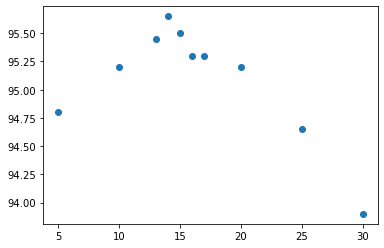

In [83]:
feature_number = [5,10,13,14,15,16,17,20,25,30]
accuracy_of_feature = [94.8,95.2,95.45,95.65,95.5,95.3,95.3,95.2,94.65,93.9]
plt.scatter(feature_number,accuracy_of_feature)

In [54]:
from tensorflow import keras
from tensorflow.keras import layers

In [72]:
def build_model1(input_node):
    inputs = layers.Input(shape = input_node, name = "input",dtype=np.float32)
    x = tf.keras.layers.Dense(128,activation='relu',name='hidden1')(inputs)
    x = layers.Dropout(0.1)(x)
    outputs = tf.keras.layers.Dense(2,activation='softmax',name='output')(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

def build_model2(input_node):
    inputs = layers.Input(shape = input_node, name = "input",dtype=np.float32)
    x = tf.keras.layers.Dense(256,activation='relu',name='hidden1')(inputs)
    x = layers.Dropout(0.1)(x)
    outputs = tf.keras.layers.Dense(2,activation='softmax',name='output')(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model


def build_model3(input_node):
    inputs = layers.Input(shape = input_node, name = "input",dtype=np.float32)
    x = tf.keras.layers.Dense(128,activation='relu',name='hidden1')(inputs)
    x = layers.Dropout(0.1)(x)
    x = tf.keras.layers.Dense(128,activation='relu',name='hidden2')(x)
    x = layers.Dropout(0.1)(x)
    outputs = tf.keras.layers.Dense(2,activation='softmax',name='output')(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model


def build_model4(input_node):
    inputs = layers.Input(shape = input_node, name = "input",dtype=np.float32)
    x = tf.keras.layers.Dense(128,activation='relu',name='hidden1')(inputs)
    x = layers.Dropout(0.1)(x)
    x = tf.keras.layers.Dense(256,activation='relu',name='hidden2')(x)
    x = layers.Dropout(0.1)(x)
    outputs = tf.keras.layers.Dense(2,activation='softmax',name='output')(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model


def build_model5(input_node):
    inputs = layers.Input(shape = input_node, name = "input",dtype=np.float32)
    x = tf.keras.layers.Dense(128,activation='relu',name='hidden1')(inputs)
    x = layers.Dropout(0.1)(x)
    x = tf.keras.layers.Dense(512,activation='relu',name='hidden2')(x)
    x = layers.Dropout(0.1)(x)
    x = tf.keras.layers.Dense(256,activation='relu',name='hidden3')(x)
    x = layers.Dropout(0.1)(x)
    outputs = tf.keras.layers.Dense(2,activation='softmax',name='output')(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

def build_model6(input_node):
    inputs = layers.Input(shape = input_node, name = "input",dtype=np.float32)
    x = tf.keras.layers.Dense(128,activation='relu',name='hidden1')(inputs)
    x = layers.Dropout(0.1)(x)
    x = tf.keras.layers.Dense(256,activation='relu',name='hidden2')(x)
    x = layers.Dropout(0.1)(x)
    x = tf.keras.layers.Dense(256,activation='relu',name='hidden3')(x)
    x = layers.Dropout(0.1)(x)
    outputs = tf.keras.layers.Dense(2,activation='softmax',name='output')(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model


def build_model7(input_node):
    inputs = layers.Input(shape = input_node, name = "input",dtype=np.float32)
    x = tf.keras.layers.Dense(128,activation='relu',name='hidden1')(inputs)
    x = layers.Dropout(0.1)(x)
    x = tf.keras.layers.Dense(256,activation='relu',name='hidden2')(x)
    x = layers.Dropout(0.1)(x)
    x = tf.keras.layers.Dense(256,activation='relu',name='hidden3')(x)
    x = layers.Dropout(0.1)(x)
    x = tf.keras.layers.Dense(128,activation='relu',name='hidden4')(x)
    x = layers.Dropout(0.1)(x)
    outputs = tf.keras.layers.Dense(2,activation='softmax',name='output')(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model



def build_model8(input_node):
    inputs = layers.Input(shape = input_node, name = "input",dtype=np.float32)
    x = tf.keras.layers.Dense(128,activation='relu',name='hidden1')(inputs)
    x = layers.Dropout(0.1)(x)
    x = tf.keras.layers.Dense(256,activation='relu',name='hidden2')(x)
    x = layers.Dropout(0.1)(x)
    x = tf.keras.layers.Dense(512,activation='relu',name='hidden3')(x)
    x = layers.Dropout(0.1)(x)
    x = tf.keras.layers.Dense(256,activation='relu',name='hidden4')(x)
    x = layers.Dropout(0.1)(x)
    outputs = tf.keras.layers.Dense(2,activation='softmax',name='output')(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [75]:
def split_data_ann(x,y,train_size=0.9,shuffle=True):
    size = len(x)
    indices = np.arange(1,size,1)
    if shuffle==True:
        random.shuffle(indices)
        
    train_samples = 30000
    test_samples = 20000
    x_train = x[indices[:train_samples]]
    y_train = y[indices[:train_samples]]
    x_valid = x[indices[train_samples:train_samples+test_samples]]
    y_valid = y[indices[train_samples:train_samples+test_samples]]
    
    return x_train,y_train,x_valid,y_valid

x_train_ann,y_train_ann,x_test_ann,y_test_ann = split_data_ann(x,y)


accuracy_list = []

num_epochs = 20
batch_size = 128

num_feature = None
index = None

for feature_num, feature_subset in best_features_subset:
    if feature_num==14:
        num_feature = feature_num
        index = feature_subset
        break
        
index = tf.convert_to_tensor(index)
x_temp_train = tf.gather(x_train_ann,index,axis=1)
x_temp_test = tf.gather(x_test_ann,index,axis=1)
x_temp_train = np.array(x_temp_train)
x_temp_test = np.array(x_temp_test)


model1 = build_model1(num_feature)
model1.summary()
model1.fit(x_temp_train,y_train_ann,batch_size = batch_size,
         epochs = num_epochs)

y_pred_hot = model1.predict(x_temp_test)
y_pred_temp = np.array(y_pred_hot.argmax(axis=1))
temp_accuracy = accuracy_score(y_pred_temp,y_test_ann)
accuracy_list.append(["model1",temp_accuracy])

###########################################################################################################

model2 = build_model2(num_feature)
model2.summary()
model2.fit(x_temp_train,y_train_ann,batch_size = batch_size,
         epochs = num_epochs)

y_pred_hot = model2.predict(x_temp_test)
y_pred_temp = np.array(y_pred_hot.argmax(axis=1))
temp_accuracy = accuracy_score(y_pred_temp,y_test_ann)
accuracy_list.append(["model2",temp_accuracy])

#############################################################################################################

model3 = build_model3(num_feature)
model3.summary()
model3.fit(x_temp_train,y_train_ann,batch_size = batch_size,
         epochs = num_epochs)

y_pred_hot = model3.predict(x_temp_test)
y_pred_temp = np.array(y_pred_hot.argmax(axis=1))
temp_accuracy = accuracy_score(y_pred_temp,y_test_ann)
accuracy_list.append(["model3",temp_accuracy])

#############################################################################################################

model4 = build_model4(num_feature)
model4.summary()
model4.fit(x_temp_train,y_train_ann,batch_size = batch_size,
         epochs = num_epochs)

y_pred_hot = model4.predict(x_temp_test)
y_pred_temp = np.array(y_pred_hot.argmax(axis=1))
temp_accuracy = accuracy_score(y_pred_temp,y_test_ann)
accuracy_list.append(["model4",temp_accuracy])

#################################################################################################################

model5 = build_model5(num_feature)
model5.summary()
model5.fit(x_temp_train,y_train_ann,batch_size = batch_size,
         epochs = num_epochs)

y_pred_hot = model5.predict(x_temp_test)
y_pred_temp = np.array(y_pred_hot.argmax(axis=1))
temp_accuracy = accuracy_score(y_pred_temp,y_test_ann)
accuracy_list.append(["model5",temp_accuracy])

###################################################################################################################

model6 = build_model6(num_feature)
model6.summary()
model6.fit(x_temp_train,y_train_ann,batch_size = batch_size,
         epochs = num_epochs)

y_pred_hot = model6.predict(x_temp_test)
y_pred_temp = np.array(y_pred_hot.argmax(axis=1))
temp_accuracy = accuracy_score(y_pred_temp,y_test_ann)
accuracy_list.append(["model6",temp_accuracy])

#############################################################################################################

model7 = build_model7(num_feature)
model7.summary()
model7.fit(x_temp_train,y_train_ann,batch_size = batch_size,
         epochs = num_epochs)

y_pred_hot = model7.predict(x_temp_test)
y_pred_temp = np.array(y_pred_hot.argmax(axis=1))
temp_accuracy = accuracy_score(y_pred_temp,y_test_ann)
accuracy_list.append(["model7",temp_accuracy])

#############################################################################################################

model8 = build_model8(num_feature)
model8.summary()
model8.fit(x_temp_train,y_train_ann,batch_size = batch_size,
         epochs = num_epochs)

y_pred_hot = model8.predict(x_temp_test)
y_pred_temp = np.array(y_pred_hot.argmax(axis=1))
temp_accuracy = accuracy_score(y_pred_temp,y_test_ann)
accuracy_list.append(["model8",temp_accuracy])

Model: "functional_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 14)]              0         
_________________________________________________________________
hidden1 (Dense)              (None, 128)               1920      
_________________________________________________________________
dropout_34 (Dropout)         (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 2)                 258       
Total params: 2,178
Trainable params: 2,178
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
235/235 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.8718
Epoch 2/20
235/235 [==============================] - 0s 1ms/step - loss: 0.1610 - accuracy: 0.9387
Epoch 3/20
235/235 [=============================

235/235 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9704
Epoch 14/20
235/235 [==============================] - 0s 1ms/step - loss: 0.0742 - accuracy: 0.9711
Epoch 15/20
235/235 [==============================] - 0s 1ms/step - loss: 0.0724 - accuracy: 0.9714
Epoch 16/20
235/235 [==============================] - 0s 1ms/step - loss: 0.0687 - accuracy: 0.9731
Epoch 17/20
235/235 [==============================] - 0s 1ms/step - loss: 0.0667 - accuracy: 0.9741
Epoch 18/20
235/235 [==============================] - 0s 1ms/step - loss: 0.0616 - accuracy: 0.9761
Epoch 19/20
235/235 [==============================] - 0s 1ms/step - loss: 0.0608 - accuracy: 0.9756
Epoch 20/20
235/235 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9776
Model: "functional_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 14)]        

235/235 [==============================] - 1s 3ms/step - loss: 0.1998 - accuracy: 0.9116
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1401 - accuracy: 0.9425
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1237 - accuracy: 0.9504
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1126 - accuracy: 0.9550
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1052 - accuracy: 0.9583
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0977 - accuracy: 0.9609
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0932 - accuracy: 0.9627
Epoch 8/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0886 - accuracy: 0.9652
Epoch 9/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0860 - accuracy: 0.9661
Epoch 10/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0830 - accuracy: 0.9675
Epoch 11/2

235/235 [==============================] - 1s 5ms/step - loss: 0.0891 - accuracy: 0.9657
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0854 - accuracy: 0.9659
Epoch 11/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0802 - accuracy: 0.9693
Epoch 12/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0774 - accuracy: 0.9701
Epoch 13/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0730 - accuracy: 0.9718
Epoch 14/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0720 - accuracy: 0.9714
Epoch 15/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0696 - accuracy: 0.9734
Epoch 16/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0650 - accuracy: 0.9743
Epoch 17/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0692 - accuracy: 0.9724
Epoch 18/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0597 - accuracy: 0.9770
Ep

In [84]:
model_names = []
accuracy_of_model = []
for model_name, accuracy in accuracy_list:
    print("MODEL NAME: ",model_name," ","Accuracy: ",accuracy)
    model_names.append(model_name)
    accuracy_of_model.append(accuracy)

MODEL NAME:  model1   Accuracy:  0.97155
MODEL NAME:  model2   Accuracy:  0.9749
MODEL NAME:  model3   Accuracy:  0.9734
MODEL NAME:  model4   Accuracy:  0.9742
MODEL NAME:  model5   Accuracy:  0.9822
MODEL NAME:  model6   Accuracy:  0.9831
MODEL NAME:  model7   Accuracy:  0.9815
MODEL NAME:  model8   Accuracy:  0.98175


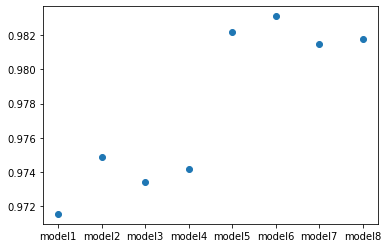

In [87]:
plt.scatter(model_names,accuracy_of_model)

In [78]:
print(x_test_ann.shape)

(20000, 31)
